In [1]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = './BMA Assesment Bat.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Calculate the vector components of the bat (Top - Knob)
data['BatVector_X'] = data['TopBat_X'] - data['Knob_X']
data['BatVector_Y'] = data['TopBat_Y'] - data['Knob_Y']
data['BatVector_Z'] = data['TopBat_Z'] - data['Knob_Z']

# Calculate the magnitude of the bat vector
data['BatMagnitude'] = np.sqrt(data['BatVector_X']**2 + data['BatVector_Y']**2 + data['BatVector_Z']**2)

# Calculate the vertical attack angle (angle with horizontal plane)
data['VerticalAttackAngle'] = np.degrees(
    np.arcsin(data['BatVector_Z'] / data['BatMagnitude'])
)

# Calculate the horizontal attack angle (angle of projection on XY plane with X-axis)
data['ProjectionMagnitude'] = np.sqrt(data['BatVector_X']**2 + data['BatVector_Y']**2)
data['HorizontalAttackAngle'] = np.degrees(
    np.arctan2(data['BatVector_Y'], data['BatVector_X'])
)

# Save the results to a new Excel file
output_path = './Bat_Attack_Angles.xlsx'
data.to_excel(output_path, index=False)

print(f"Analysis complete. Results saved to {output_path}")


Analysis complete. Results saved to ./Bat_Attack_Angles.xlsx


Frame of Ball Contact: 528
Vertical Attack Angle at Contact: -35.21 degrees
Horizontal Attack Angle at Contact: -107.59 degrees


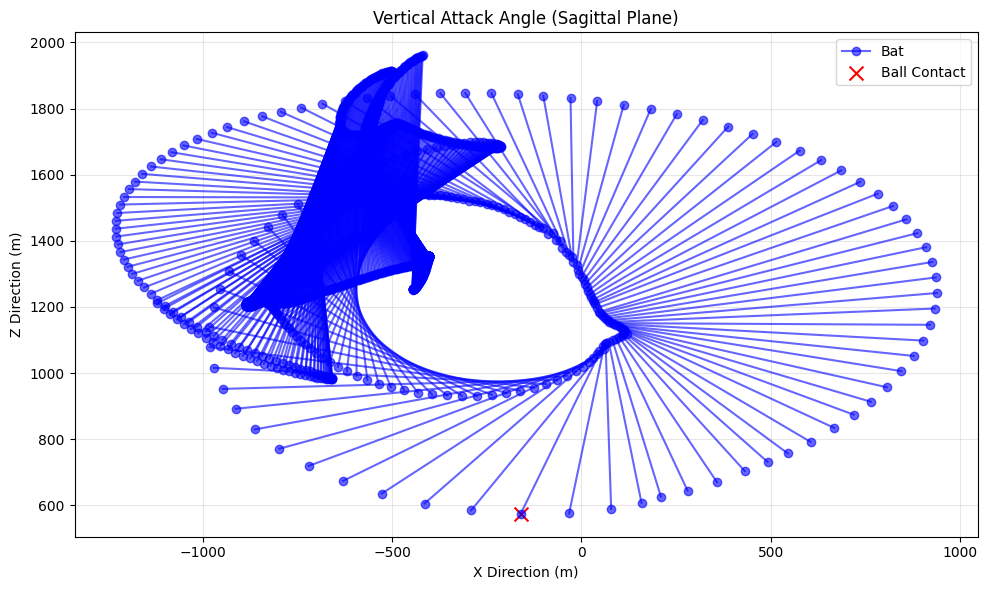

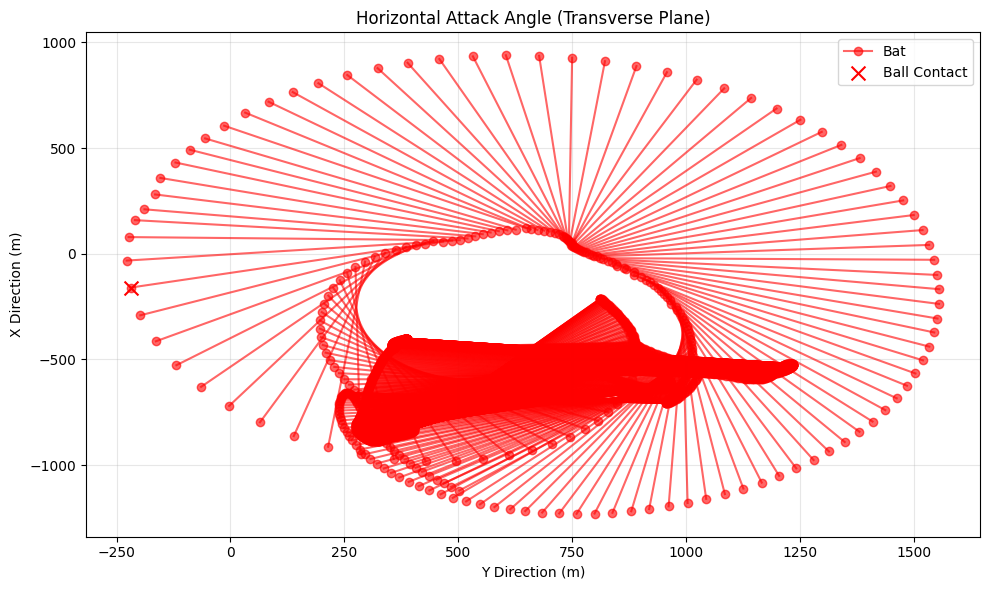

Analysis complete. Results saved to ./Bat_Attack_Angles.xlsx


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = './BMA Assesment Bat.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Calculate the vector components of the bat (Top - Knob)
data['BatVector_X'] = data['TopBat_X'] - data['Knob_X']
data['BatVector_Y'] = data['TopBat_Y'] - data['Knob_Y']
data['BatVector_Z'] = data['TopBat_Z'] - data['Knob_Z']

# Calculate the magnitude of the bat vector
data['BatMagnitude'] = np.sqrt(data['BatVector_X']**2 + data['BatVector_Y']**2 + data['BatVector_Z']**2)

# Calculate the vertical attack angle (angle with horizontal plane)
data['VerticalAttackAngle'] = np.degrees(
    np.arcsin(data['BatVector_Z'] / data['BatMagnitude'])
)

# Calculate the horizontal attack angle (angle of projection on XY plane with X-axis)
data['ProjectionMagnitude'] = np.sqrt(data['BatVector_X']**2 + data['BatVector_Y']**2)
data['HorizontalAttackAngle'] = np.degrees(
    np.arctan2(data['BatVector_Y'], data['BatVector_X'])
)

# Calculate velocity for TopBat and Knob
for axis in ['X', 'Y', 'Z']:
    data[f'TopBat_Velocity_{axis}'] = data[f'TopBat_{axis}'].diff()
    data[f'Knob_Velocity_{axis}'] = data[f'Knob_{axis}'].diff()

# Calculate speed (magnitude of velocity) for TopBat and Knob
data['TopBat_Speed'] = np.sqrt(
    data['TopBat_Velocity_X']**2 + data['TopBat_Velocity_Y']**2 + data['TopBat_Velocity_Z']**2
)
data['Knob_Speed'] = np.sqrt(
    data['Knob_Velocity_X']**2 + data['Knob_Velocity_Y']**2 + data['Knob_Velocity_Z']**2
)

# Identify the frame of ball contact as the maximum speed for the TopBat
contact_frame = data['TopBat_Speed'].idxmax()

# Extract angles at ball contact
vertical_attack_angle_contact = data.loc[contact_frame, 'VerticalAttackAngle']
horizontal_attack_angle_contact = data.loc[contact_frame, 'HorizontalAttackAngle']

# Print results
print(f"Frame of Ball Contact: {contact_frame}")
print(f"Vertical Attack Angle at Contact: {vertical_attack_angle_contact:.2f} degrees")
print(f"Horizontal Attack Angle at Contact: {horizontal_attack_angle_contact:.2f} degrees")

# Plot: Vertical Attack Angle (Sagittal Plane)
plt.figure(figsize=(10, 6))
for i in range(len(data)):
    plt.plot([data['Knob_X'][i], data['TopBat_X'][i]], 
             [data['Knob_Z'][i], data['TopBat_Z'][i]], 'b-o', alpha=0.6, label='Bat' if i == 0 else "")
plt.scatter(data['TopBat_X'][contact_frame], data['TopBat_Z'][contact_frame], color='red', marker='x', s=100, label='Ball Contact')
plt.xlabel('X Direction (m)')
plt.ylabel('Z Direction (m)')
plt.title('Vertical Attack Angle (Sagittal Plane)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Plot: Horizontal Attack Angle (Transverse Plane)
plt.figure(figsize=(10, 6))
for i in range(len(data)):
    plt.plot([data['Knob_Y'][i], data['TopBat_Y'][i]], 
             [data['Knob_X'][i], data['TopBat_X'][i]], 'r-o', alpha=0.6, label='Bat' if i == 0 else "")
plt.scatter(data['TopBat_Y'][contact_frame], data['TopBat_X'][contact_frame], color='red', marker='x', s=100, label='Ball Contact')
plt.xlabel('Y Direction (m)')
plt.ylabel('X Direction (m)')
plt.title('Horizontal Attack Angle (Transverse Plane)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Save the results to a new Excel file
output_path = './Bat_Attack_Angles.xlsx'
data.to_excel(output_path, index=False)

print(f"Analysis complete. Results saved to {output_path}")


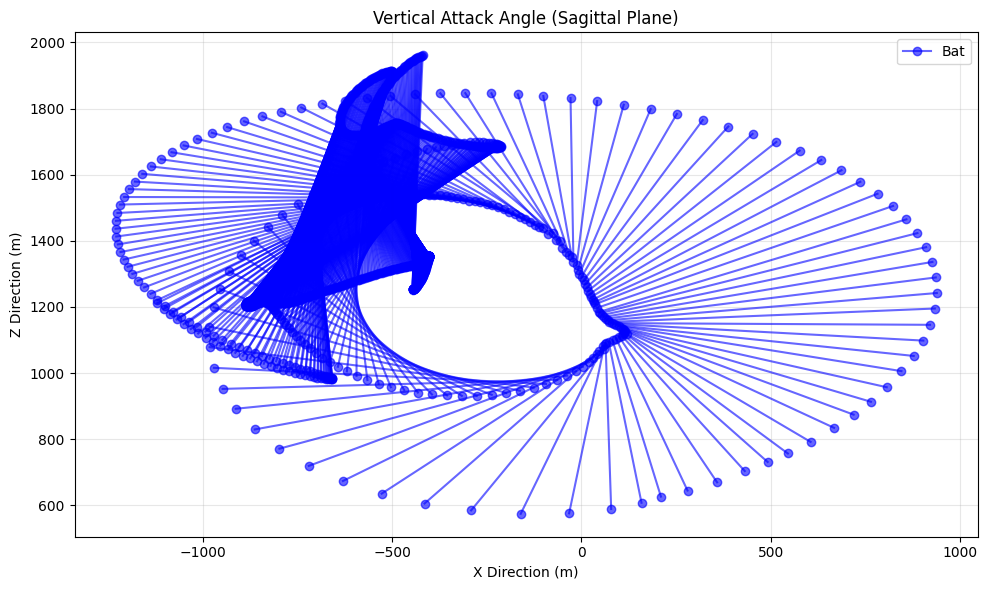

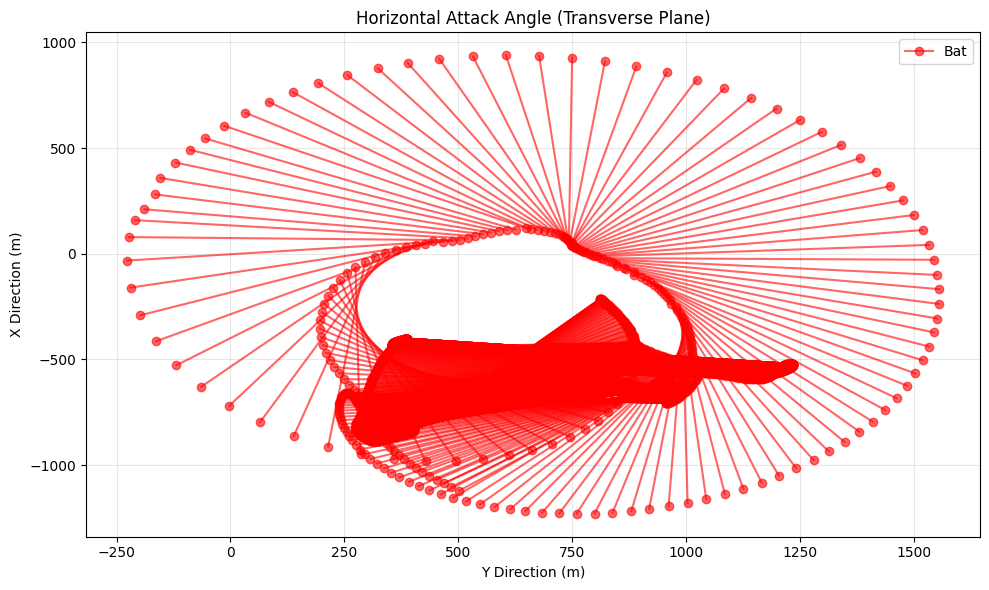

Analysis complete. Results saved to ./Bat_Attack_Angles.xlsx


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = './BMA Assesment Bat.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Calculate the vector components of the bat (Top - Knob)
data['BatVector_X'] = data['TopBat_X'] - data['Knob_X']
data['BatVector_Y'] = data['TopBat_Y'] - data['Knob_Y']
data['BatVector_Z'] = data['TopBat_Z'] - data['Knob_Z']

# Calculate the magnitude of the bat vector
data['BatMagnitude'] = np.sqrt(data['BatVector_X']**2 + data['BatVector_Y']**2 + data['BatVector_Z']**2)

# Calculate the vertical attack angle (angle with horizontal plane)
data['VerticalAttackAngle'] = np.degrees(
    np.arcsin(data['BatVector_Z'] / data['BatMagnitude'])
)

# Calculate the horizontal attack angle (angle of projection on XY plane with X-axis)
data['ProjectionMagnitude'] = np.sqrt(data['BatVector_X']**2 + data['BatVector_Y']**2)
data['HorizontalAttackAngle'] = np.degrees(
    np.arctan2(data['BatVector_Y'], data['BatVector_X'])
)

# Plot: Vertical Attack Angle (Sagittal Plane)
plt.figure(figsize=(10, 6))
for i in range(len(data)):
    plt.plot([data['Knob_X'][i], data['TopBat_X'][i]], 
             [data['Knob_Z'][i], data['TopBat_Z'][i]], 'b-o', alpha=0.6, label='Bat' if i == 0 else "")
plt.xlabel('X Direction (m)')
plt.ylabel('Z Direction (m)')
plt.title('Vertical Attack Angle (Sagittal Plane)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Plot: Horizontal Attack Angle (Transverse Plane)
plt.figure(figsize=(10, 6))
for i in range(len(data)):
    plt.plot([data['Knob_Y'][i], data['TopBat_Y'][i]], 
             [data['Knob_X'][i], data['TopBat_X'][i]], 'r-o', alpha=0.6, label='Bat' if i == 0 else "")
plt.xlabel('Y Direction (m)')
plt.ylabel('X Direction (m)')
plt.title('Horizontal Attack Angle (Transverse Plane)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Save the results to a new Excel file
output_path = './Bat_Attack_Angles.xlsx'
data.to_excel(output_path, index=False)

print(f"Analysis complete. Results saved to {output_path}")
